In [1220]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1221]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [1222]:
df_1 = pd.read_csv('Historical-transaction-data.csv')
df_2 = pd.read_csv('Store-info.csv')
df_3=pd.read_csv("Testing-data.csv")


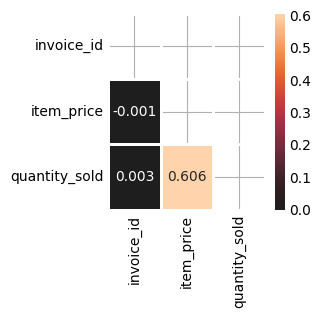

In [1223]:
corr=df_1.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
# Add the mask to the heatmap
fig, ax = plt.subplots(figsize=(2,2)) 
sns.heatmap(corr, mask=mask,  center=0, linewidths=1, annot=True, fmt=".3f", ax = ax)
plt.show()

In [1224]:
# monday_sales = df_1[df_1['transaction_date'].dt.day_name() == 'Monday']

# # calculate the total count of Mondays
# total_monday_count = monday_sales['transaction_date'].count()

# print("Total count of Mondays:", total_monday_count)

# convert the transaction_date column to datetime
df_1['transaction_date'] = pd.to_datetime(df_1['transaction_date'])

# extract the day name for each transaction
df_1['day_of_week'] = df_1['transaction_date'].dt.day_name()

# count the number of unique transactions for each day of the week
total_unique_transactions = df_1.groupby('day_of_week')['transaction_date'].nunique()

print("Total number of unique transactions by day of week:\n", total_unique_transactions)

# convert the transaction_date column to datetime
df_1['transaction_date'] = pd.to_datetime(df_1['transaction_date'])

# extract the day name for each transaction
df_1['day_of_week'] = df_1['transaction_date'].dt.day_name()

# count the number of unique transactions for each day of the week
total_unique_transactions = df_1.groupby('day_of_week')['transaction_date'].nunique()

# convert output to dataframe
df_output = pd.DataFrame({'day_of_week': total_unique_transactions.index, 'total_unique_transactions': total_unique_transactions.values})

df_output.head()




Total number of unique transactions by day of week:
 day_of_week
Friday       9
Monday       9
Saturday     9
Sunday       9
Thursday     8
Tuesday      9
Wednesday    9
Name: transaction_date, dtype: int64


,day_of_week,total_unique_transactions
0,Friday,9
1,Monday,9
2,Saturday,9
3,Sunday,9
4,Thursday,8


In [1225]:
import pandas as pd

# load the dataset into a pandas dataframe
# df_1 = pd.read_csv("your_dataset.csv")

# convert the transaction_date column to datetime
df_1['transaction_date'] = pd.to_datetime(df_1['transaction_date'])

# create a new column with the day of the week
df_1['day_of_week'] = df_1['transaction_date'].dt.day_name()

# group the dataframe by day of the week and sum the quantity_sold column
daily_sales = df_1.groupby('day_of_week')['quantity_sold'].sum()

print(daily_sales)

df_1['transaction_date'] = pd.to_datetime(df_1['transaction_date'])

# create a new column with the day of the week
df_1['day_of_week'] = df_1['transaction_date'].dt.day_name()

# group the dataframe by day of the week and sum the quantity_sold column
daily_sales = df_1.groupby('day_of_week')['quantity_sold'].sum()

# convert the series to a dataframe
daily_sales_df = daily_sales.reset_index()

daily_sales_df.head()

day_of_week
Friday       140914
Monday       108235
Saturday     173107
Sunday       155703
Thursday     104087
Tuesday      115681
Wednesday    114913
Name: quantity_sold, dtype: int64


,day_of_week,quantity_sold
0,Friday,140914
1,Monday,108235
2,Saturday,173107
3,Sunday,155703
4,Thursday,104087


In [1226]:
merged_df = pd.merge(df_output, daily_sales_df, on='day_of_week')

In [1227]:
merged_df["average"]=merged_df['quantity_sold']/merged_df['total_unique_transactions']

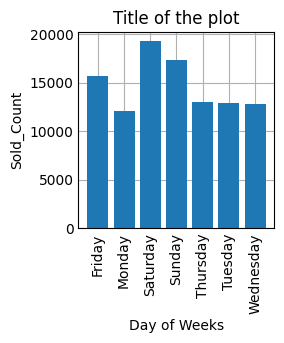

<Figure size 600x1000 with 0 Axes>

In [1228]:
import seaborn as sns
import matplotlib.pyplot as plt

# create a sample dataframe
# data = {'sales': [100, 200, 300, 400, 500],

# plot a bar chart using seaborn
x=merged_df['day_of_week']
y=merged_df['average']
plt.bar(x, y,)
plt.xticks(rotation=90)

# add labels and title
plt.xlabel('Day of Weeks')
plt.ylabel('Sold_Count')
plt.title('Title of the plot')
plt.figure(figsize=(6, 10))

# display the plot
plt.show()


### Fill missing value

In [1229]:
null_counts = df_1.isnull().sum()
print(null_counts)

item_description    35928
transaction_date        0
invoice_id           6320
customer_id             0
shop_id                 0
item_price              0
quantity_sold           0
day_of_week             0
dtype: int64


In [1230]:
df_1 = df_1.drop_duplicates()


In [1231]:
df_1['item_description'] = df_1['item_description'].fillna("NAN SODA 1L")

In [1232]:
grouped = df_1.groupby(['shop_id'])

# loop through each group
for name, group in grouped:
    # find the maximum invoice_id value for the group
    max_invoice_id = group['invoice_id'].max()
    
    # fill missing invoice_id values with new ones based on the maximum value for the group
    group['invoice_id'].fillna(max_invoice_id + 1, inplace=True)
    
    # replace the group in the original dataframe with the updated group
    df_1.loc[group.index] = group


In [1233]:
null_counts = df_1.isnull().sum()
print(null_counts)

item_description    0
transaction_date    0
invoice_id          0
customer_id         0
shop_id             0
item_price          0
quantity_sold       0
day_of_week         0
dtype: int64


### Split the date to features

In [1235]:
# dates = df_1['transaction_date']
# Dates = []
# df_1['transaction_date'] = pd.to_datetime(df_1['transaction_date'])
# # Extract the substring corresponding to the day component
# for date in dates:
#     day_string = date[8:10]
    
#     # Convert the day string to an integer
#     day = int(day_string)
    
#     Dates.append(day)
    
    
# df_1['date'] =  Dates

dates = df_1['transaction_date']
Dates = []

# Extract the day component from each Timestamp object
for date in dates:
    day = date.day
    Dates.append(day)
    
df_1['date'] =  Dates

In [1236]:
sl_holidays = [pd.to_datetime(d) for d in ['2021-10-19', '2021-10-20', '2021-11-04', '2022-11-18', 
                                           '2022-12-18', '2022-12-25']]

# assume that the transaction_date column is a string column
df_1['transaction_date'] = pd.to_datetime(df_1['transaction_date'])

# now you can use the .dt accessor on the transaction_date column
df_1['is_weekend'] = df_1['transaction_date'].dt.weekday.isin([5, 6])

df_1['is_holiday'] = df_1['transaction_date'].isin(sl_holidays)

# convert boolean values to integers
df_1['is_weekend'] = df_1['is_weekend'].astype(int)

df_1['is_holiday'] = df_1['is_holiday'].astype(int)

In [1237]:
# df_1.head()

In [1238]:
shop_invoice_count = df_1.groupby('shop_id')['invoice_id'].count()
# shop_invoice_counts = df_1.groupby('shop_id')['invoice_id'].value_counts().reset_index(name='invoice_count')
# shop_invoice_counts

In [1239]:
shop_invoice_count= pd.DataFrame(shop_invoice_count)
shop_invoice_count = shop_invoice_count.rename(columns={'invoice_id': 'count_invoice'})
# shop_invoice_count 

### Spilit the Item_description 

In [1240]:

# extract item_name and item_size from item_description
df_1[['item_name', 'item_size']] = df_1['item_description'].str.extract('([\w\s]+) (\d*\.?\d+)\w{0,2}$')

# convert item_size to liters
df_1['item_size'] = df_1['item_size'].astype(float)
df_1.loc[df_1['item_description'].str.contains('ML', na=False), 'item_size'] /= 1000

# display the result
# df_1.head

### Merge two data set

In [1241]:
# df_2 = pd.read_csv('/kaggle/input/data-storm-4/Store-info.csv')

# Merge the two DataFrames on the primary key column
df_11 = pd.merge(shop_invoice_count, df_2, on='shop_id')
# df_1=pd.merge(df_1,shop_invoice_count, on='shop_id')
df_12= pd.merge(df_1, df_11, on='shop_id')
# df_12
df_1=df_12
# df_1

In [1242]:
# # df_1['item_price'] = df_1.groupby(['item_description'])['item_price'].apply(lambda x: x.fill(x.mode()[0]))
# df_1['item_price'] = df_1.groupby('item_description')['item_price'].transform(lambda x: x.fill(x.mode()[0]))

# df_1

def get_mode(series):
    return series.mode().iloc[0]

# Group the data frame by the primary key column and apply the mode function to each group
mode_values = df_1.groupby('item_description')['item_price'].transform(get_mode)

# Identify values that are not equal to the mode value within each group
not_mode = df_1['item_price'] != mode_values

# Replace those values with the mode value using the loc method
df_1.loc[not_mode, 'item_price'] = mode_values
# df_1

### Add new feature

In [1243]:
df_1['total_amount'] = df_1['item_price']*df_1['quantity_sold']
# df_1

In [1244]:
grouped = df_1.groupby('shop_id')

# Calculate the income and total quantity sold for each shop
income = grouped.apply(lambda x: (x['item_price'] * x['quantity_sold']).sum())
quantity = grouped['quantity_sold'].sum()

# Combine the income and quantity data into a new DataFrame
grouped = pd.concat([income, quantity], axis=1)

# Rename the columns
grouped.columns = ['income', 'total_quantity']
grouped['income_per_quantity'] = grouped['income']/grouped['total_quantity']
grouped
df_13=pd.merge(df_1, grouped, on='shop_id')
df_1=df_13
df_1

,item_description,transaction_date,invoice_id,customer_id,shop_id,item_price,quantity_sold,day_of_week,date,is_weekend,is_holiday,item_name,item_size,count_invoice,shop_area_sq_ft,shop_profile,total_amount,income,total_quantity,income_per_quantity
0,ORANGE BARLEY 1.5L,2021-12-11 00:00:00+00:00,147.0,BGXA,SHOP008,220,2,Saturday,11,1,0,ORANGE BARLEY,1.5,244,678,Moderate,440,71625,461,155.368764
1,TONIC PET 500ML,2021-12-13 00:00:00+00:00,484.0,VN7V,SHOP008,160,2,Monday,13,0,0,TONIC PET,0.5,244,678,Moderate,320,71625,461,155.368764
2,CREAM SODA 1L,2021-12-13 00:00:00+00:00,484.0,VN7V,SHOP008,150,2,Monday,13,0,0,CREAM SODA,1.0,244,678,Moderate,300,71625,461,155.368764
3,GINGER BEER 1.5L,2021-12-10 00:00:00+00:00,1000053.0,VT9C,SHOP008,220,1,Friday,10,0,0,GINGER BEER,1.5,244,678,Moderate,220,71625,461,155.368764
4,GINGER BEER 1.5L,2021-12-10 00:00:00+00:00,1000057.0,8QLS,SHOP008,220,1,Friday,10,0,0,GINGER BEER,1.5,244,678,Moderate,220,71625,461,155.368764
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442758,NAN SODA 1L,2021-12-09 00:00:00+00:00,7030409.0,QVA7,SHOP072,70,1,Thursday,9,0,0,NAN SODA,1.0,4160,617,High,70,1184460,8173,144.923529
442759,FIT O ORANGE 200ML,2021-12-11 00:00:00+00:00,7030809.0,HXMG,SHOP072,60,2,Saturday,11,1,0,FIT O ORANGE,0.2,4160,617,High,120,1184460,8173,144.923529
442760,BOTTLED DRINKING WATER 500ML,2021-12-11 00:00:00+00:00,7030820.0,OUH2,SHOP072,35,1,Saturday,11,1,0,BOTTLED DRINKING WATER,0.5,4160,617,High,35,1184460,8173,144.923529
442761,GINGER BEER 1.5L,2021-10-21 00:00:00+00:00,7031845.0,5IJM,SHOP072,220,1,Thursday,21,0,0,GINGER BEER,1.5,4160,617,High,220,1184460,8173,144.923529


In [1245]:
# convert transaction_date column to datetime type
df_1['transaction_date'] = pd.to_datetime(df_1['transaction_date'])

# calculate week of the month
df_1['weekper_month'] = ((df_1['transaction_date'].dt.day - 1) // 7 + 1)

# print dataframe
# df_1

In [1246]:

# Convert transaction_date column to datetime object
df_1['transaction_date'] = pd.to_datetime(df_1['transaction_date'])

# Group by week and calculate weekly income
df_1['weekly_income'] = df_1.groupby(df_1['transaction_date'].dt.week)['total_amount'].transform('sum')
# df_1.head()

### Filling the missing value

In [1247]:
# df_1['item_name'] = df_1['item_name'].fillna("SODA")
mean_int = df_1['item_size'].mean().astype(int)
df_1['item_size'] =df_1['item_size'].fillna(mean_int)

# df_1
df_1.columns



Index(['item_description', 'transaction_date', 'invoice_id', 'customer_id',
       'shop_id', 'item_price', 'quantity_sold', 'day_of_week', 'date',
       'is_weekend', 'is_holiday', 'item_name', 'item_size', 'count_invoice',
       'shop_area_sq_ft', 'shop_profile', 'total_amount', 'income',
       'total_quantity', 'income_per_quantity', 'weekper_month',
       'weekly_income'],
      dtype='object')

### Change the data frame Order

In [1248]:
new_order = ['transaction_date','invoice_id','customer_id','shop_id','item_name','item_size','item_price','quantity_sold','total_amount','income_per_quantity', 'shop_area_sq_ft','date','is_weekend','is_holiday','count_invoice', 'shop_profile','weekly_income','weekper_month'
            ]

# Reorder the columns in the dataframe
df_1 = df_1[new_order]
# df_1.head()
# df_1
df_1.columns

Index(['transaction_date', 'invoice_id', 'customer_id', 'shop_id', 'item_name',
       'item_size', 'item_price', 'quantity_sold', 'total_amount',
       'income_per_quantity', 'shop_area_sq_ft', 'date', 'is_weekend',
       'is_holiday', 'count_invoice', 'shop_profile', 'weekly_income',
       'weekper_month'],
      dtype='object')

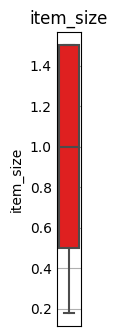

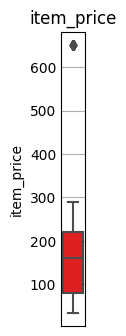

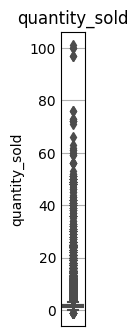

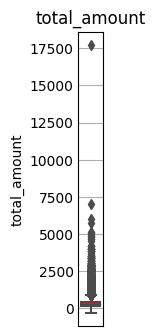

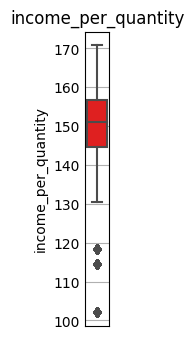

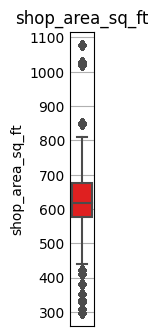

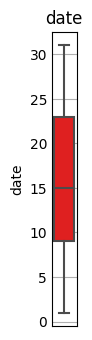

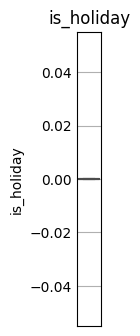

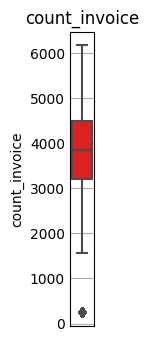

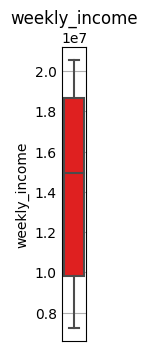

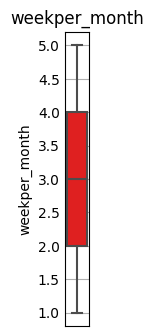

In [1249]:
import matplotlib.pyplot as plt
import seaborn as sns

for i in ['item_size', 'item_price', 'quantity_sold', 'total_amount','income_per_quantity', 'shop_area_sq_ft', 'date',
       'is_holiday', 'count_invoice', 'weekly_income',
       'weekper_month']:
    plt.figure(figsize=(0.25, 3))
    sns.boxplot(y=i, data=df_1,color='red')
    plt.title(i)
    plt.show()

<Axes: xlabel='shop_profile', ylabel='count'>

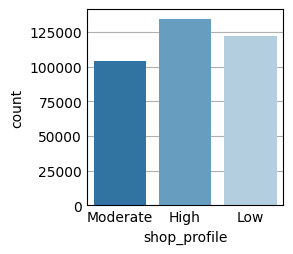

In [1250]:
sns.countplot(x='shop_profile', data=df_1)

### Feature Scaling

In [1251]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Sample dataset
for i in df_1:
    if i not in ['transaction_date','invoice_id','customer_id','shop_id','item_name','shop_profile','item_encoded','is_weekend','is_holiday']:
        col_data = df_1[i]

    # Perform min-max scaling on the selected column
        scaled_data = (col_data - col_data.min()) / (col_data.max() - col_data.min())

        # Update the selected column in the original data frame with the scaled data
        df_1[i] = scaled_data
df_1

,transaction_date,invoice_id,customer_id,shop_id,item_name,item_size,item_price,quantity_sold,total_amount,income_per_quantity,shop_area_sq_ft,date,is_weekend,is_holiday,count_invoice,shop_profile,weekly_income,weekper_month
0,2021-12-11 00:00:00+00:00,147.0,BGXA,SHOP008,ORANGE BARLEY,1.000000,0.300813,0.029412,0.040601,0.774702,0.487805,0.333333,1,0,0.00000,Moderate,1.000000,0.25
1,2021-12-13 00:00:00+00:00,484.0,VN7V,SHOP008,TONIC PET,0.242424,0.203252,0.029412,0.033927,0.774702,0.487805,0.400000,0,0,0.00000,Moderate,0.000000,0.25
2,2021-12-13 00:00:00+00:00,484.0,VN7V,SHOP008,CREAM SODA,0.621212,0.186992,0.029412,0.032814,0.774702,0.487805,0.400000,0,0,0.00000,Moderate,0.000000,0.25
3,2021-12-10 00:00:00+00:00,1000053.0,VT9C,SHOP008,GINGER BEER,1.000000,0.300813,0.019608,0.028365,0.774702,0.487805,0.300000,0,0,0.00000,Moderate,1.000000,0.25
4,2021-12-10 00:00:00+00:00,1000057.0,8QLS,SHOP008,GINGER BEER,1.000000,0.300813,0.019608,0.028365,0.774702,0.487805,0.300000,0,0,0.00000,Moderate,1.000000,0.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
442758,2021-12-09 00:00:00+00:00,7030409.0,QVA7,SHOP072,NAN SODA,0.621212,0.056911,0.019608,0.020022,0.622836,0.409499,0.266667,0,0,0.66171,High,1.000000,0.25
442759,2021-12-11 00:00:00+00:00,7030809.0,HXMG,SHOP072,FIT O ORANGE,0.015152,0.040650,0.029412,0.022803,0.622836,0.409499,0.333333,1,0,0.66171,High,1.000000,0.25
442760,2021-12-11 00:00:00+00:00,7030820.0,OUH2,SHOP072,BOTTLED DRINKING WATER,0.242424,0.000000,0.019608,0.018076,0.622836,0.409499,0.333333,1,0,0.66171,High,1.000000,0.25
442761,2021-10-21 00:00:00+00:00,7031845.0,5IJM,SHOP072,GINGER BEER,1.000000,0.300813,0.019608,0.028365,0.622836,0.409499,0.666667,0,0,0.66171,High,0.743843,0.50




### Standardization

In [1252]:
# import pandas as pd
# from sklearn.preprocessing import StandardScaler

# # create sample DataFrame
# # define standardization function
# scaler = StandardScaler()

# # fit and transform the DataFrame
# # df_1 = scaler.fit_transform(df_1)

# for i in df_1:
# # fit and transform column
#     if i not in ['transaction_date','invoice_id','customer_id','shop_id','item_name','shop_profile','item_encoded','is_weekend','is_holiday']:
#         df_1[i] = scaler.fit_transform(df_1[[i]])


# # convert the result back to a DataFrame
# # df_1 = pd.DataFrame(df_1, columns=df_1.columns)

In [1253]:
# df_1 = df_1.dropna(subset=['item_name'])

In [1254]:
df_1.head()

,transaction_date,invoice_id,customer_id,shop_id,item_name,item_size,item_price,quantity_sold,total_amount,income_per_quantity,shop_area_sq_ft,date,is_weekend,is_holiday,count_invoice,shop_profile,weekly_income,weekper_month
0,2021-12-11 00:00:00+00:00,147.0,BGXA,SHOP008,ORANGE BARLEY,1.000000,0.300813,0.029412,0.040601,0.774702,0.487805,0.333333,1,0,0.0,Moderate,1.0,0.25
1,2021-12-13 00:00:00+00:00,484.0,VN7V,SHOP008,TONIC PET,0.242424,0.203252,0.029412,0.033927,0.774702,0.487805,0.400000,0,0,0.0,Moderate,0.0,0.25
2,2021-12-13 00:00:00+00:00,484.0,VN7V,SHOP008,CREAM SODA,0.621212,0.186992,0.029412,0.032814,0.774702,0.487805,0.400000,0,0,0.0,Moderate,0.0,0.25
3,2021-12-10 00:00:00+00:00,1000053.0,VT9C,SHOP008,GINGER BEER,1.000000,0.300813,0.019608,0.028365,0.774702,0.487805,0.300000,0,0,0.0,Moderate,1.0,0.25
4,2021-12-10 00:00:00+00:00,1000057.0,8QLS,SHOP008,GINGER BEER,1.000000,0.300813,0.019608,0.028365,0.774702,0.487805,0.300000,0,0,0.0,Moderate,1.0,0.25


In [1255]:
# unique_categories = df_1['item_name'].unique()
# num_categories = df_1['item_name'].nunique()
# print(unique_categories)
# print(num_categories)

In [1256]:
# null_counts = df_1.isnull().sum()
# print(null_counts)

### Sorting

In [1257]:
df_sorted = df_1.sort_values(by='shop_id')
df_1=df_sorted
df_1.head()

,transaction_date,invoice_id,customer_id,shop_id,item_name,item_size,item_price,quantity_sold,total_amount,income_per_quantity,shop_area_sq_ft,date,is_weekend,is_holiday,count_invoice,shop_profile,weekly_income,weekper_month
50020,2021-10-16 00:00:00+00:00,71340.0,9HZ9,SHOP001,ORANGE BARLEY,1.000000,0.300813,0.019608,0.028365,0.747731,0.362003,0.500000,1,0,0.280669,Low,0.045764,0.50
50814,2021-12-11 00:00:00+00:00,3035533.0,G0AJ,SHOP001,GINGER BEER,0.621212,0.186992,0.029412,0.032814,0.747731,0.362003,0.333333,1,0,0.280669,Low,1.000000,0.25
50815,2021-12-11 00:00:00+00:00,3035533.0,G0AJ,SHOP001,GINGER BEER,0.621212,0.186992,0.019608,0.024472,0.747731,0.362003,0.333333,1,0,0.280669,Low,1.000000,0.25
50816,2021-10-18 00:00:00+00:00,3035932.0,IQM6,SHOP001,GINGER BEER SUGAR FREE,0.242424,0.073171,0.019608,0.020578,0.747731,0.362003,0.566667,0,0,0.280669,Low,0.743843,0.50
50817,2021-12-09 00:00:00+00:00,3035932.0,YI1R,SHOP001,GINGER BEER,1.000000,0.300813,0.029412,0.040601,0.747731,0.362003,0.266667,0,0,0.280669,Low,1.000000,0.25


In [1258]:
# df_sorted = df_sorted.dropna(subset=['item_name'])

### One hot encoding

In [1259]:
# column_to_encode = 'item_name'
# encoded_df=df_1.copy()

# # Perform one-hot encoding on the selected column
# one_hot_encoded = pd.get_dummies(encoded_df[column_to_encode], prefix=column_to_encode)

# # Add the one-hot encoded columns to the original DataFrame
# encoded_df = pd.concat([encoded_df, one_hot_encoded], axis=1)

# # Drop the original column that was one-hot encoded
# encoded_df = encoded_df.drop(column_to_encode, axis=1)

# # Save the updated DataFrame to a new CSV file
# # df.to_csv('output.csv', index=False)
# encoded_df.head()

In [1260]:
# encoded_df = encoded_df.dropna(subset=['item_name'])
# data = data.dropna()

In [1261]:
# my_list = ['ORANGE BARLEY', 'TONIC PET', 'CREAM SODA', 'GINGER BEER','CREAM SODA APPLE POP', 'SODA', 'BOTTLED DRINKING WATER', 'LEMONADE','KIK COLA', 'STRAWBERRY MILK', 'SODA PET', 'FIT O MIXED FRUIT','NECTO', 'FIT O ORANGE', 'FIT O MANGO', 'GINGER BEER SUGAR FREE','ORANGE CRUSH', 'CHOCOLATE MILK', 'TWISTEE APPLE', 'DRY GINGER ALE PET', 'LIME CRUSH JUICE']
# len(my_list)
# my_dict = {i: my_list[i] for i in range(len(my_list))}

# # print(my_dict)
# swapped_dict = {v: k for k, v in my_dict.items()}

# print(swapped_dict)


In [1262]:
import matplotlib.pyplot as plt
import seaborn as sns

# fig, ax = plt.subplots()
# boxplot = ax.boxplot(df_1['item_size'])

# for i in df_1:
#     if i not in ['transaction_date','invoice_id','customer_id','shop_id','item_name','shop_profile','item_encoded','is_weekend','is_holiday']:
    
#         plt.figure()
#         df_1.boxplot([column])


### Instead (Label)

In [1263]:
# # ['ORANGE BARLEY' 'TONIC PET' 'CREAM SODA' 'GINGER BEER'
# #  'CREAM SODA APPLE POP' 'SODA' 'BOTTLED DRINKING WATER' 'LEMONADE'
# #  'KIK COLA' 'STRAWBERRY MILK' 'SODA PET' 'FIT O MIXED FRUIT''NECTO'
# #  'FIT O ORANGE' 'FIT O MANGO' 'GINGER BEER SUGAR FREE' 'ORANGE CRUSH'
# #  'CHOCOLATE MILK' 'TWISTEE APPLE' 'DRY GINGER ALE PET' 'LIME CRUSH JUICE']

# # import pandas as pd
# from sklearn.preprocessing import LabelEncoder

# # Load the CSV file into a pandas DataFrame
# # df = pd.read_csv('filename.csv')

# # Create a LabelEncoder object
# le = LabelEncoder()

# # Fit the LabelEncoder on the column and transform the column
# #filtered_df['column_name_encoded'] = le.fit_transform(filtered_df["shop_profile"])

# # Save the updated DataFrame to a new CSV file
# # filtered_df.to_csv('filename_encoded.csv', index=False)

# # define the mapping between original and encoded values
# mapping = swapped_dict

# # fit the encoder to the 'shopprofile' column using the mapping
# le.fit([mapping[val] for val in df_1['item_name']])

# # transform the 'shopprofile' column using the fitted encoder
# df_1['item_encoded'] = le.transform([mapping[val] for val in df_1['item_name']])


# df_1.head()


import pandas as pd
from sklearn.preprocessing import LabelEncoder


# create a sample DataFrame

# create a LabelEncoder object
le = LabelEncoder()

# fit and transform the 'fruits' column
df_1['item_encoded'] = le.fit_transform(df_1['item_name'])
df_1['customer_id_encoded']=le.fit_transform(df_1['customer_id'])
# df_1['shop_encoded'] = le.fit_transform(df_1['shop_id'])
encoded_df=df_1

In [1264]:
# df_1.head()

In [1265]:
# grouped_df=df_1.copy()
# grouped_df['total']  = grouped_df.groupby(['item_name'])['quantity_sold'].transform('sum')
# grouped_df.head()

In [1266]:
# grouped_df[["item_name","total"]]

In [1267]:
# # Load the dataset into a pandas DataFrame

# # Create a line plot using seaborn
# plt.figure(figsize=(14,6))
# sns.lineplot(x='item_name', y='total', data=grouped_df)
# plt.xticks(rotation=90)

# # Add axis labels and a title to th

# # Show the plot
# plt.show()

In [1268]:
encoded_df.head()

,transaction_date,invoice_id,customer_id,shop_id,item_name,item_size,item_price,quantity_sold,total_amount,income_per_quantity,shop_area_sq_ft,date,is_weekend,is_holiday,count_invoice,shop_profile,weekly_income,weekper_month,item_encoded,customer_id_encoded
50020,2021-10-16 00:00:00+00:00,71340.0,9HZ9,SHOP001,ORANGE BARLEY,1.000000,0.300813,0.019608,0.028365,0.747731,0.362003,0.500000,1,0,0.280669,Low,0.045764,0.50,15,50606
50814,2021-12-11 00:00:00+00:00,3035533.0,G0AJ,SHOP001,GINGER BEER,0.621212,0.186992,0.029412,0.032814,0.747731,0.362003,0.333333,1,0,0.280669,Low,1.000000,0.25,8,85139
50815,2021-12-11 00:00:00+00:00,3035533.0,G0AJ,SHOP001,GINGER BEER,0.621212,0.186992,0.019608,0.024472,0.747731,0.362003,0.333333,1,0,0.280669,Low,1.000000,0.25,8,85139
50816,2021-10-18 00:00:00+00:00,3035932.0,IQM6,SHOP001,GINGER BEER SUGAR FREE,0.242424,0.073171,0.019608,0.020578,0.747731,0.362003,0.566667,0,0,0.280669,Low,0.743843,0.50,9,99809
50817,2021-12-09 00:00:00+00:00,3035932.0,YI1R,SHOP001,GINGER BEER,1.000000,0.300813,0.029412,0.040601,0.747731,0.362003,0.266667,0,0,0.280669,Low,1.000000,0.25,8,183538


In [1269]:
filtered_df = encoded_df[encoded_df['shop_profile'].notnull()]
na_df=encoded_df[encoded_df['shop_profile'].isnull()]
# encoded_df.head()
# filtered_df["shop_profile"]
# na_df.head()

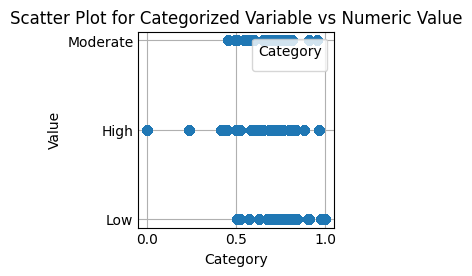

In [1270]:
import matplotlib.pyplot as plt
import pandas as pd

# create sample data
# data = {'Category': ['A', 'B', 'C', 'A', 'B', 'C'],
#         'Value': [10, 15, 20, 25, 30, 35]}

# create a DataFrame from the data
# df = pd.DataFrame(data)
plt.style.use('_mpl-gallery')
# create a scatter plot
sizes = np.random.uniform(15, 80, len(x))
colors = np.random.uniform(15, 80, len(x))
fig, ax = plt.subplots()
scatter = ax.scatter( filtered_df['income_per_quantity'],filtered_df["shop_profile"])

# set labels for the axes
ax.set_xlabel('Category')
ax.set_ylabel('Value')

# add a legend
legend = ax.legend(*scatter.legend_elements(), loc='upper right', title='Category')

# add a title
ax.set_title('Scatter Plot for Categorized Variable vs Numeric Value')

plt.show()


In [1271]:
# import matplotlib.pyplot as plt
# import pandas as pd

# # 'category': filtered_df['shop_profile'],
# # 'feature': filtered_df['income_per_quantity']


# # create a color map for the categories
# color_map = {'A': 'red', 'B': 'green', 'C': 'blue'}

# # create a scatter plot
# plt.scatter(filtered_df['income_per_quantity'], range(len(data)), c=filtered_df['shop_profile'].map(color_map), s=50)

# # add axis labels and a title
# plt.xlabel('Continuous feature')
# plt.ylabel('Category')
# plt.title('Scatter plot for a categorized variable vs continuous feature')

# # show the plot
# plt.show()



### Label Encoding

In [1272]:
# import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load the CSV file into a pandas DataFrame
# df = pd.read_csv('filename.csv')

# Create a LabelEncoder object
le = LabelEncoder()

# Fit the LabelEncoder on the column and transform the column
#filtered_df['column_name_encoded'] = le.fit_transform(filtered_df["shop_profile"])

# Save the updated DataFrame to a new CSV file
# filtered_df.to_csv('filename_encoded.csv', index=False)

# define the mapping between original and encoded values
mapping = {'Moderate': 1, 'Low': 0, 'High': 2}

# fit the encoder to the 'shopprofile' column using the mapping
le.fit([mapping[val] for val in filtered_df['shop_profile']])

# transform the 'shopprofile' column using the fitted encoder
filtered_df['shop_profile_encoded'] = le.transform([mapping[val] for val in filtered_df['shop_profile']])


filtered_df.head()

,transaction_date,invoice_id,customer_id,shop_id,item_name,item_size,item_price,quantity_sold,total_amount,income_per_quantity,...,date,is_weekend,is_holiday,count_invoice,shop_profile,weekly_income,weekper_month,item_encoded,customer_id_encoded,shop_profile_encoded
50020,2021-10-16 00:00:00+00:00,71340.0,9HZ9,SHOP001,ORANGE BARLEY,1.000000,0.300813,0.019608,0.028365,0.747731,...,0.500000,1,0,0.280669,Low,0.045764,0.50,15,50606,0
50814,2021-12-11 00:00:00+00:00,3035533.0,G0AJ,SHOP001,GINGER BEER,0.621212,0.186992,0.029412,0.032814,0.747731,...,0.333333,1,0,0.280669,Low,1.000000,0.25,8,85139,0
50815,2021-12-11 00:00:00+00:00,3035533.0,G0AJ,SHOP001,GINGER BEER,0.621212,0.186992,0.019608,0.024472,0.747731,...,0.333333,1,0,0.280669,Low,1.000000,0.25,8,85139,0
50816,2021-10-18 00:00:00+00:00,3035932.0,IQM6,SHOP001,GINGER BEER SUGAR FREE,0.242424,0.073171,0.019608,0.020578,0.747731,...,0.566667,0,0,0.280669,Low,0.743843,0.50,9,99809,0
50817,2021-12-09 00:00:00+00:00,3035932.0,YI1R,SHOP001,GINGER BEER,1.000000,0.300813,0.029412,0.040601,0.747731,...,0.266667,0,0,0.280669,Low,1.000000,0.25,8,183538,0


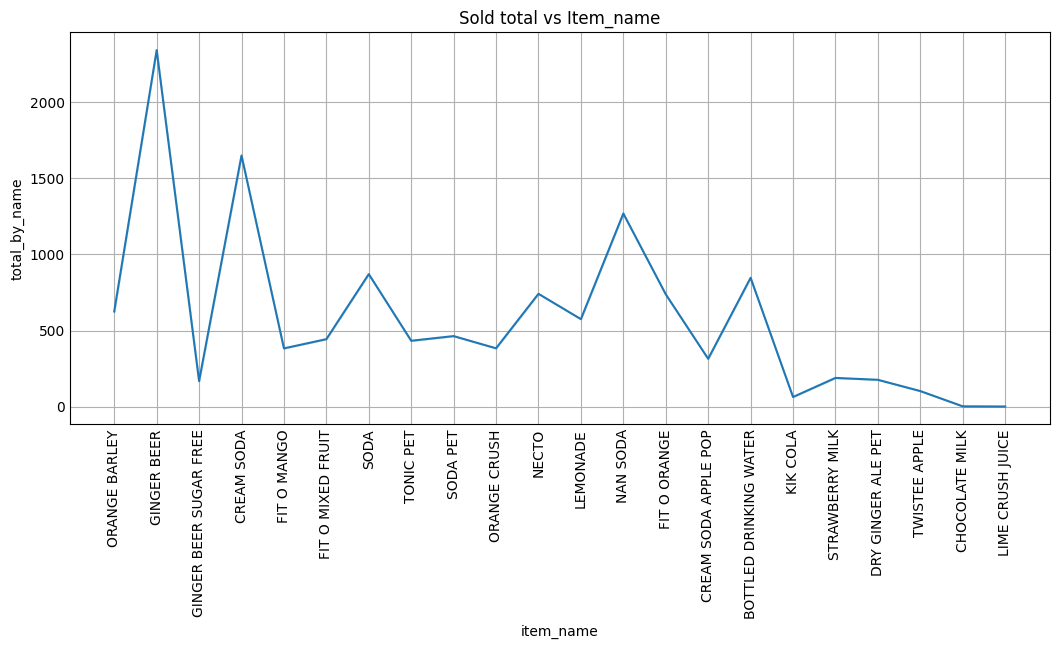

In [1273]:
# df_sorted = filtered_df.sort_values(by='shop_id')
# df_sorted

# Plot
grouped_df=df_1.copy()
grouped_df['total_by_name']  = grouped_df.groupby(['item_name'])['quantity_sold'].transform('sum')
grouped_df.head()
grouped_df[["item_name","total_by_name"]]
# Load the dataset into a pandas DataFrame

# Create a line plot using seaborn
# plt.figure(figsize=(14,6))
# sns.lineplot(x='item_name', y='total', data=grouped_df)
# plt.xticks(rotation=90)

# # Add axis labels and a title to th

# # Show the plot
# plt.show()
# # Load the dataset into a pandas DataFrame

# Create a line plot using seaborn
plt.figure(figsize=(10,4))
sns.lineplot(x='item_name', y='total_by_name', data=grouped_df)
plt.xticks(rotation=90)
plt.title("Sold total vs Item_name")

# Add axis labels and a title to th

# Show the plot
plt.show()


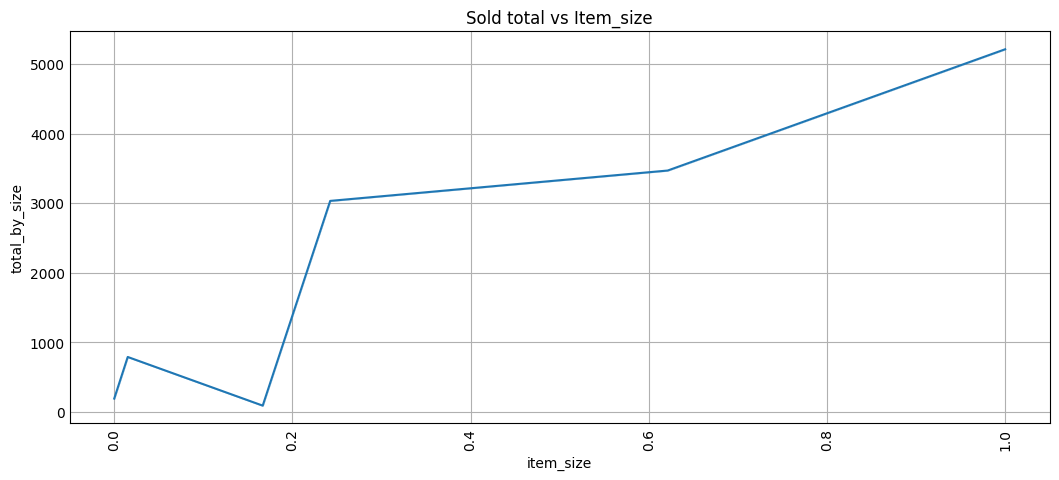

In [1274]:
# df_sorted = filtered_df.sort_values(by='shop_id')
# df_sorted

# Plot
grouped_df=df_1.copy()
grouped_df['total_by_size']  = grouped_df.groupby(['item_size'])['quantity_sold'].transform('sum')
grouped_df.head()
grouped_df[["item_size","total_by_size"]]
# Load the dataset into a pandas DataFrame

# Create a line plot using seaborn
# plt.figure(figsize=(14,6))
# sns.lineplot(x='item_name', y='total', data=grouped_df)
# plt.xticks(rotation=90)

# # Add axis labels and a title to th

# # Show the plot
# plt.show()
# # Load the dataset into a pandas DataFrame

# Create a line plot using seaborn
plt.figure(figsize=(10,4))
sns.lineplot(x='item_size', y='total_by_size', data=grouped_df)
plt.xticks(rotation=90)
plt.title("Sold total vs Item_size")

# Add axis labels and a title to th

# Show the plot
plt.show()


In [1275]:
# calculate the index for splitting the dataframe
split_idx = int(0.8 * len(filtered_df))
# split the dataframe into training and testing sets
train_df =filtered_df.iloc[:split_idx]
test_df = filtered_df.iloc[split_idx:]
train_df.head()

,transaction_date,invoice_id,customer_id,shop_id,item_name,item_size,item_price,quantity_sold,total_amount,income_per_quantity,...,date,is_weekend,is_holiday,count_invoice,shop_profile,weekly_income,weekper_month,item_encoded,customer_id_encoded,shop_profile_encoded
50020,2021-10-16 00:00:00+00:00,71340.0,9HZ9,SHOP001,ORANGE BARLEY,1.000000,0.300813,0.019608,0.028365,0.747731,...,0.500000,1,0,0.280669,Low,0.045764,0.50,15,50606,0
50814,2021-12-11 00:00:00+00:00,3035533.0,G0AJ,SHOP001,GINGER BEER,0.621212,0.186992,0.029412,0.032814,0.747731,...,0.333333,1,0,0.280669,Low,1.000000,0.25,8,85139,0
50815,2021-12-11 00:00:00+00:00,3035533.0,G0AJ,SHOP001,GINGER BEER,0.621212,0.186992,0.019608,0.024472,0.747731,...,0.333333,1,0,0.280669,Low,1.000000,0.25,8,85139,0
50816,2021-10-18 00:00:00+00:00,3035932.0,IQM6,SHOP001,GINGER BEER SUGAR FREE,0.242424,0.073171,0.019608,0.020578,0.747731,...,0.566667,0,0,0.280669,Low,0.743843,0.50,9,99809,0
50817,2021-12-09 00:00:00+00:00,3035932.0,YI1R,SHOP001,GINGER BEER,1.000000,0.300813,0.029412,0.040601,0.747731,...,0.266667,0,0,0.280669,Low,1.000000,0.25,8,183538,0


In [1276]:
X_train=train_df.drop(columns=['transaction_date','invoice_id','customer_id','shop_id','shop_profile','shop_profile_encoded','item_name','is_weekend'])
y_train=train_df["shop_profile_encoded"]
X_test=test_df.drop(columns=['transaction_date','invoice_id','customer_id','shop_id','shop_profile','shop_profile_encoded','item_name'])
y_test=test_df["shop_profile_encoded"]

In [1279]:
# import matplotlib.pyplot as plt
# from sklearn.ensemble import RandomForestClassifier
# import pandas as pd

# # create a random forest classifier
# rfc = RandomForestClassifier()

# # fit the classifier to the training data
# rfc.fit(X_train, y_train)

# # get the feature importances
# importances = rfc.feature_importances_

# # create a horizontal bar plot of feature importances
# fig, ax = plt.subplots()
# ax.barh(X_train.columns, importances)
# ax.set_xlabel('Importance')
# ax.set_ylabel('Feature')
# ax.set_title('Feature Importances Plot')

# plt.show()


In [1280]:
# X_train.isnull().sum()

In [1281]:
# X=filtered_df.drop(columns=['is_holiday','transaction_date','invoice_id','customer_id','shop_id','shop_profile','shop_profile_encoded','item_name'])
# y=filtered_df["shop_profile_encoded"]

### Outliers

In [1282]:
# def count_outliers(col_data):
#     Q1 = col_data.quantile(0.25)
#     Q3 = col_data.quantile(0.75)

#     # Calculate the interquartile range (IQR)
#     IQR = Q3 - Q1

#     # Define the threshold for outliers (1.5 times the IQR)
#     threshold = 1.5 * IQR

#     # Identify the outliers
#     outliers = col_data[(col_data < Q1 - threshold) | (col_data > Q3 + threshold)]

#     # Count the number of outliers
#     num_outliers = len(outliers)

#     print("Number of outliers in column", ":", num_outliers)



In [1283]:
# X = X.fillna(0)
# X.head()

In [1284]:
# from sklearn.model_selection import train_test_split

# y = filtered_df['shop_profile_encoded']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=50)

In [1285]:
# X_train.head(5)

### Logistic

In [1286]:
# import pandas as pd
# from sklearn.linear_model import LogisticRegression
# from sklearn.model_selection import train_test_split

# # load the data into a DataFrame
# # data = pd.read_csv('data.csv')

# # # split the data into training and test sets
# # X_train, X_test, y_train, y_test = train_test_split(data[['feature1', 'feature2', 'feature3']], data['target'], test_size=0.2)

# # create a logistic regression object and fit the training data
# lr = LogisticRegression()
# lr.fit(X_train, y_train)

# # evaluate the performance of the model on the test set
# score = lr.score(X_test, y_test)
# print(score * 100)

### SVM

In [1287]:
# from sklearn import datasets
# from sklearn.model_selection import train_test_split
# from sklearn.svm import SVC


# # Load the iris datase

# # Define the SVM classifier
# svm = SVC(kernel='linear')

# # Fit the training data
# svm.fit(X_train, y_train)

# # Predict the classes of new data
# # y_pred = clf.predict(X_test)

# # Print the accuracy score
# # print("Accuracy:", clf.score(X_test, y_test))


In [1288]:
# import pandas as pd
# from sklearn.svm import SVC
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

# # load the data into a DataFrame
# # data = pd.read_csv('data.csv')

# # # split the data into training and test sets
# # X_train, X_test, y_train, y_test = train_test_split(data[['feature1', 'feature2', 'feature3']], data['target'], test_size=0.2)

# # create an SVM object and fit the training data
# svm = SVC(kernel='linear')
# svm.fit(X_train, y_train)

# # predict the class labels for the test set
# y_pred = svm.predict(X_test)

# # evaluate the performance of the model on the test set
# score = accuracy_score(y_test, y_pred)
# print("Accuracy: {:.2f}%".format(score * 100))


In [1289]:
# import xgboost as xgb
# import numpy as np

# # Convert data to DMatrix format
# dtrain = xgb.DMatrix(X_train, label=y_train)
# dtest = xgb.DMatrix(X_test, label=y_test)

# # Set hyperparameters
# params = {
#     'objective': 'multi:softmax',
#     'num_class': len(np.unique(y_train)),
#     'max_depth': 6,
#     'eta': 0.3,
#     'eval_metric': 'merror'
# }

# # Train the model
# model = xgb.train(params, dtrain, num_boost_round=10)

# # Predict on test set
# y_pred = model.predict(dtest)

# # Evaluate the model
# accuracy = np.sum(y_pred == y_test) / len(y_test)
# print('Accuracy:', accuracy)

### Neural Network

In [1290]:
# from sklearn.neural_network import MLPClassifier

# # create neural network classifier object
# clf = MLPClassifier(hidden_layer_sizes=(10,5), activation='relu', solver='adam', max_iter=200)

# # fit the classifier to the training data
# clf.fit(X_train, y_train)

# # predict the class labels for the test data
# y_pred = clf.predict(X_test)

# # calculate the accuracy of the classifier on the test data
# accuracy = clf.score(X_test, y_test)*100
# print('Accuracy of the  MLPClassifier is equal ' + str(round(accuracy, 2)) + ' %.')

In [1291]:
# from sklearn.ensemble import RandomForestClassifier
# for i in range(10,100,10):
#     for j in range(50,500,50):
#         # Create a random forest classifier with 100 trees
#         rf = RandomForestClassifier(n_estimators=j, random_state=i)

#         # Train the random forest classifier on the training data
#         rf.fit(X_train, y_train)

#         # Predict the classes of the testing data
#         y_pred = rf.predict(X_test)

#         # Evaluate the accuracy of the model
#         accuracy = rf.score(X_test, y_test)*100
#         print('Accuracy of the  RandomForestClassifier is equal '+str(i)+' '+str(j)+' ' + str(round(accuracy, 2)) + ' %.')

0.5543563420201737


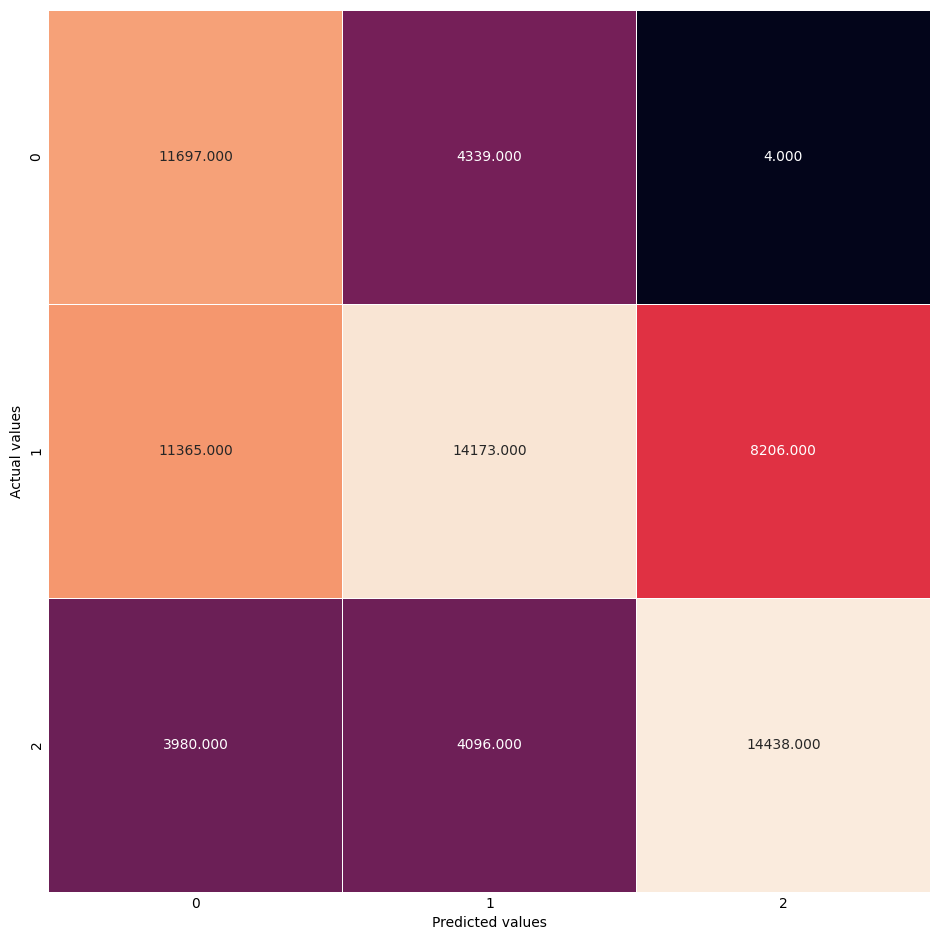

              precision    recall  f1-score   support

           0       0.43      0.73      0.54     16040
           1       0.63      0.42      0.50     33744
           2       0.64      0.64      0.64     22514

    accuracy                           0.56     72298
   macro avg       0.57      0.60      0.56     72298
weighted avg       0.59      0.56      0.55     72298



In [1292]:
from sklearn.metrics import f1_score
print(f1_score(y_test, y_pred, average='weighted'))
### another idea
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)
cm
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize = (9,9))
sns.heatmap(cm, annot = True, fmt = '0.3f', linewidth = 0.5, square = True, cbar = False)
plt.ylabel('Actual values')
plt.xlabel('Predicted values')
plt.show()
print(metrics.classification_report(y_test,y_pred))

### Random forest

In [1293]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier with 100 trees
rf = RandomForestClassifier(n_estimators=90, random_state=30)

# Train the random forest classifier on the training data
rf.fit(X_train, y_train)

# Predict the classes of the testing data
y_pred = rf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = rf.score(X_test, y_test)*100
print('Accuracy of the  RandomForestClassifier is equal ' + str(round(accuracy, 2)) + ' %.')

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- is_weekend


In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# for i in range(10,100,10):
#     for j in range(50,200,20):
#         # Create a random forest classifier with 100 trees
#         rf = RandomForestClassifier(n_estimators=j, random_state=i)

#         # Train the random forest classifier on the training data
#         rf.fit(X_train, y_train)

#         # Predict the classes of the testing data
#         y_pred = rf.predict(X_test)

#         # Evaluate the accuracy of the model
#         accuracy = rf.score(X_test, y_test)*100
#         print('Accuracy of the  RandomForestClassifier is equal '+str(i)+' '+str(j)+' ' + str(round(accuracy, 2)) + ' %.')


### Using DecisionTreeClassifier

In [ ]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# import pandas as pd

# # Load the dataset into a pandas dataframe
# # df = pd.read_csv('dataset.csv')

# # # Split the dataset into training and testing sets
# # X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.3)

# # Create a decision tree classifier object
# clf = DecisionTreeClassifier()

# # Fit the classifier to the training data
# clf.fit(X_train, y_train)

# # Make predictions on the testing data
# y_pred = clf.predict(X_test)

# # Calculate the accuracy of the classifier
# accuracy = accuracy_score(y_test, y_pred)

# print(f"Accuracy: {accuracy}")

### Naive_bayes algorithm

In [ ]:
# # Import required libraries
# from sklearn.naive_bayes import MultinomialNB
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import train_test_split
# from sklearn.feature_extraction.text import CountVectorizer


# # Split data into training and testing sets

# # Train the model
# clf = MultinomialNB()
# clf.fit(X_train, y_train)

# # Predict using the trained model
# y_pred = clf.predict(X_test)

# # Evaluate the model accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy}")

### Using KNN algorithm

In [ ]:
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# import pandas as pd


# knn = KNeighborsClassifier(n_neighbors=5)

# # Fit the classifier to the training data
# knn.fit(X_train, y_train)

# # Predict the classes of the test data
# y_pred = knn.predict(X_test)

# # Evaluate the accuracy of the classifier
# accuracy = accuracy_score(y_test, y_pred)
# print("Accuracy:", accuracy)

### Gradient Boosting.

In [ ]:
# # Import required libraries
# from sklearn.ensemble import GradientBoostingClassifier
# from sklearn.metrics import accuracy_score
# from sklearn.model_selection import train_test_split

# # Load your dataset
# # Assuming X is your feature matrix and y is your target vector

# # Split data into training and testing sets

# # Train the model
# clf = GradientBoostingClassifier()
# clf.fit(X_train, y_train)

# # Predict using the trained model
# y_pred = clf.predict(X_test)

# # Evaluate the model accuracy
# accuracy = accuracy_score(y_test, y_pred)
# print(f"Accuracy: {accuracy}")

In [ ]:
test_df = na_df
X_train=filtered_df.drop(columns=['transaction_date','invoice_id','customer_id','shop_id','shop_profile','shop_profile_encoded','item_name','is_holiday'])
y_train=filtered_df["shop_profile_encoded"]
X_test=test_df.drop(columns=['transaction_date','invoice_id','customer_id','shop_id','shop_profile','item_name'])

In [ ]:
corr=X_train.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
# Add the mask to the heatmap
fig, ax = plt.subplots(figsize=(7,7)) 
sns.heatmap(corr, mask=mask,  center=0, linewidths=1, annot=True, fmt=".2f", ax = ax)
plt.show()

In [ ]:
test_df.head()

In [ ]:
print(test_df.shape[0])
print(X_test.shape[0])

In [ ]:
X_train.fillna(0, inplace=True)
X_test.fillna(0, inplace=True)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a random forest classifier with 100 trees
rf = RandomForestClassifier(n_estimators=90, random_state=30)

# Train the random forest classifier on the training data
rf.fit(X_train, y_train)

# Predict the classes of the testing data
y_pred = rf.predict(X_test)

# Evaluate the accuracy of the mode

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# for i in range(10,100,10):
#     for j in range(50,300,30):
#         # Create a random forest classifier with 100 trees
#         rf = RandomForestClassifier(n_estimators=j, random_state=i)

#         # Train the random forest classifier on the training data
#         rf.fit(X_train, y_train)

#         # Predict the classes of the testing data
#         y_pred = rf.predict(X_test)

#         # Evaluate the accuracy of the model
#         accuracy = rf.score(X_test, y_test)*100
#         print('Accuracy of the  RandomForestClassifier is equal '+str(i)+' '+str(j)+' ' + str(round(accuracy, 2)) + ' %.')


In [1294]:
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# import pandas as pd

# # Load the dataset into a pandas dataframe
# # df = pd.read_csv('dataset.csv')

# # # Split the dataset into training and testing sets
# # X_train, X_test, y_train, y_test = train_test_split(df.drop('target', axis=1), df['target'], test_size=0.3)

# # Create a decision tree classifier object
# clf = DecisionTreeClassifier()

# # Fit the classifier to the training data
# clf.fit(X_train, y_train)

# # Make predictions on the testing data
# y_pred = clf.predict(X_test)

In [1295]:
# Convert the numpy array to a dataframe with column name "y_pred"
df_4 = pd.DataFrame({'y_pred': y_pred})
df_4

,y_pred
0,2
1,2
2,2
3,2
4,2
...,...
72293,2
72294,2
72295,2
72296,2


In [1296]:
test_df = test_df.reset_index(drop=True)
test_df

,transaction_date,invoice_id,customer_id,shop_id,item_name,item_size,item_price,quantity_sold,total_amount,income_per_quantity,...,date,is_weekend,is_holiday,count_invoice,shop_profile,weekly_income,weekper_month,item_encoded,customer_id_encoded,shop_profile_encoded
0,2021-12-10 00:00:00+00:00,4235070.0,X6PH,SHOP101,NECTO,1.000000,0.300813,0.019608,0.028365,0.809865,...,0.300000,0,0,0.747550,High,1.000000,0.25,14,176582,2
1,2021-12-10 00:00:00+00:00,4235056.0,M8DL,SHOP101,ORANGE BARLEY,1.000000,0.300813,0.029412,0.040601,0.809865,...,0.300000,0,0,0.747550,High,1.000000,0.25,15,118618,2
2,2021-12-07 00:00:00+00:00,4234677.0,KM3P,SHOP101,GINGER BEER,1.000000,0.300813,0.019608,0.028365,0.809865,...,0.200000,0,0,0.747550,High,1.000000,0.00,8,109830,2
3,2021-12-06 00:00:00+00:00,4234448.0,AJZW,SHOP101,NECTO,0.621212,0.186992,0.019608,0.024472,0.809865,...,0.166667,0,0,0.747550,High,1.000000,0.00,14,56244,2
4,2021-11-30 00:00:00+00:00,4233285.0,C8XJ,SHOP101,STRAWBERRY MILK,0.000000,0.056911,0.049020,0.031702,0.809865,...,0.966667,0,0,0.747550,High,0.858171,1.00,19,65108,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72293,2021-11-18 00:00:00+00:00,1096167.0,2AI3,SHOP127,ORANGE CRUSH,1.000000,0.300813,0.019608,0.028365,0.522079,...,0.566667,0,0,0.623352,High,0.264585,0.50,16,12101,2
72294,2021-11-18 00:00:00+00:00,1096167.0,2AI3,SHOP127,LEMONADE,1.000000,0.300813,0.029412,0.040601,0.522079,...,0.566667,0,0,0.623352,High,0.264585,0.50,11,12101,2
72295,2021-11-12 00:00:00+00:00,1094913.0,8MD9,SHOP127,LEMONADE,0.242424,0.105691,0.029412,0.027253,0.522079,...,0.366667,0,0,0.623352,High,0.179466,0.25,11,45985,2
72296,2021-12-03 00:00:00+00:00,8331755.0,MSPK,SHOP127,NECTO,1.000000,0.300813,0.019608,0.028365,0.522079,...,0.066667,0,0,0.623352,High,0.858171,0.00,14,121702,2


In [1297]:
result_df = pd.concat([test_df, df_4], axis=1)

In [1298]:
new_df =result_df.loc[:, ["shop_id", "y_pred"]]
new_df

,shop_id,y_pred
0,SHOP101,2
1,SHOP101,2
2,SHOP101,2
3,SHOP101,2
4,SHOP101,2
...,...,...
72293,SHOP127,2
72294,SHOP127,2
72295,SHOP127,2
72296,SHOP127,2


In [1299]:
mode_df = new_df.groupby('shop_id')['y_pred'].apply(lambda x: x.mean()).reset_index()

mode_df['y_pred'] = mode_df['y_pred'].astype(int)

In [1300]:
mode_df=mode_df.replace([0,1,2],["Low","Moderate","High"])

In [1301]:
mode_df = mode_df.rename(columns={'y_pred': 'shop_profile'})

In [1302]:
df_3.head()

,shop_id,shop_profile
0,SHOP046,Moderate
1,SHOP024,Moderate
2,SHOP023,Low
3,SHOP097,Low
4,SHOP044,Moderate


In [1303]:
# df_3=pd.read_csv("/kaggle/input/data-storm-4/Testing-data.csv")
df_3.drop("shop_profile", axis =1, inplace = True)
merged_df = pd.merge(df_3, mode_df, on='shop_id')

In [1304]:
merged_df.head()

,shop_id,shop_profile


In [792]:
merged_df.to_csv("Day_3_Submisson_1.csv",index=False)